In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
from random import randint

In [2]:
X = np.genfromtxt('digit.txt')
Y = np.genfromtxt('labels.txt', dtype=int)

In [56]:
def Cluster(X,center,N,numClass):
    y=np.zeros(N)
    dist=np.zeros(numClass)
    # for each point compute distance form the center of each cluster
    # then assign the it to the closest cluster
    for i in range(N):
        for j in range(numClass):
            dist[j]=np.linalg.norm(X[i,:]-center[j,:], ord=2)   
        label_xi=np.argmin(dist)
        y[i]=label_xi
    return y
        

In [36]:
def computeNewCenters(y, X, k):
    n,dim=X.shape
    center=np.zeros([k,dim])
    for label in range(k):
        mask=(y==label)
        center[label,:]=np.mean(X[mask,:],0)
        
    return center

In [83]:
def my_kmeans(X, numClass, Ytrue, rand):   
    N,d=X.shape
    mu=np.zeros([numClass,d])
    #generate first guess for centers
    if rand==True:
        for i in range(numClass):
            k=randint(0,N-1)
            mu[i,:]=X[k,:]
    else:
        mu=X[0:numClass,:]
    
    Ylabels=Cluster(X,mu,N,numClass)
    
    kmax=20
    # compute labels while not converged
    for k in range(kmax):
        mu=computeNewCenters(Ylabels,X,numClass)
        YlabelsNew=Cluster(X,mu,N,numClass)
        if np.linalg.norm(YlabelsNew-Ylabels, ord=2)==0:
            break
        else:
            Ylabels=YlabelsNew
            
    # miskate for each class
    digits=[1,3,5,7]
    mistake=np.zeros(numClass)
    SS=np.zeros(numClass)
    DigitLabel=np.zeros(numClass) #digit of each cluster
    
    for i in range(numClass):
        mask=(Ylabels==i)
        SS[i]=np.sum((np.linalg.norm(X[mask,:]-mu[i,:], ord=2, axis=1))**2)
        vote=np.zeros(len(digits))
        for m in range(len(digits)):
            vote[m]=np.sum(Ytrue[mask]==digits[m])   
        DigitLabel[i]=digits[np.argmax(vote)]
        mistake[i]=(np.sum(vote)-vote[np.argmax(vote)])
    
    mistakeRate=np.sum(mistake)*1.0/N            
    print('sum of SS(k)', np.sum(SS))    
    print('number of iteration before convergence', k+1)
    print('rate', mistakeRate)
    return (np.sum(SS), mistakeRate)

##3.5.1

In [84]:
numClusters=[2,4,6]
rand=False #random center of clasters
for nc in numClusters:
    my_kmeans(X,nc,Y, rand)

('sum of SS(k)', 536280503.03469509)
('number of iteration before convergence', 20)
('rate', 0.52200000000000002)
('sum of SS(k)', 461110943.96230918)
('number of iteration before convergence', 10)
('rate', 0.24299999999999999)
('sum of SS(k)', 431349182.91616648)
('number of iteration before convergence', 7)
('rate', 0.17999999999999999)


##3.5.2

The number of iterations for $k=6$ clusters is $\bf 7$

##3.5.3

('sum of SS(k)', 596101560.352)
('number of iteration before convergence', 1)
('rate', 0.70899999999999996)
('sum of SS(k)', 541147813.32685637)
('number of iteration before convergence', 6)
('rate', 0.45500000000000002)
('sum of SS(k)', 483242737.50042325)
('number of iteration before convergence', 16)
('rate', 0.245)
('sum of SS(k)', 464879709.96953726)
('number of iteration before convergence', 11)
('rate', 0.246)
('sum of SS(k)', 454775970.96905541)
('number of iteration before convergence', 8)
('rate', 0.216)
('sum of SS(k)', 432201243.74991322)
('number of iteration before convergence', 20)
('rate', 0.161)
('sum of SS(k)', 409095363.99664617)
('number of iteration before convergence', 13)
('rate', 0.14499999999999999)
('sum of SS(k)', 403170656.9650197)
('number of iteration before convergence', 20)
('rate', 0.22)
('sum of SS(k)', 392332174.04604208)
('number of iteration before convergence', 18)
('rate', 0.109)
('sum of SS(k)', 384951575.94477701)
('number of iteration before co

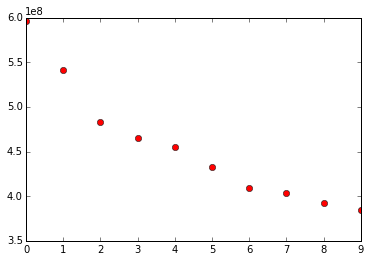

In [92]:
numClusters=range(1,11)
rand=True #random center of clasters
SSS=np.zeros(10)
misRate=np.zeros(10)
for nc in numClusters:
    [sss, mr]=my_kmeans(X,nc,Y, rand)
    SSS[nc-1]=sss
    misRate[nc-1]=mr

plt.plot(SSS,'ro') 


##3.5.4

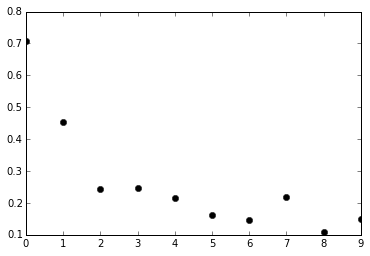

In [93]:
plt.plot(misRate,'ko') 